In [117]:
import pandas as pd
import json
from functions.mongo import connectCollection
from bson.objectid import ObjectId
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import webbrowser

In [99]:
db, coll = connectCollection('chats','messages')
with open('./input/chats.json') as f:
    chats_json = json.load(f)
coll.insert_many(chats_json)

In [7]:
data = list(coll.find({}))

In [8]:
namelst=[]
for i in range(len(data)):
    name = data[i]['userName']
    userid = data[i]['idUser']
    tup = (userid,name)
    namelst.append(tup)
namelst = set(namelst)
lst = []
for e in namelst:
    uid = e[0]
    name= e[1]
    dictionary = {
        'User_id':uid,
        'name': name
    }
    lst.append(dictionary)
lst

[{'User_id': 1, 'name': 'Mike Wazowski'},
 {'User_id': 6, 'name': 'Danny Torrances Finger'},
 {'User_id': 2, 'name': 'Leia Organa'},
 {'User_id': 7, 'name': 'Danny Torrance'},
 {'User_id': 4, 'name': 'Ellen Ripley'},
 {'User_id': 0, 'name': 'John Wick'},
 {'User_id': 5, 'name': 'J. Jonah Jameson'},
 {'User_id': 3, 'name': 'Tony Stark'}]

In [9]:
db, collus = connectCollection('chats','users')
with open('./output/users.json', 'w') as fp:
    json.dump(lst, fp)

In [10]:
with open('./output/users.json') as f:
    users_json = json.load(f)
collus.insert_many(users_json)

In [11]:
usersdata = list(collus.find({}))
dic_ids = {}
for i in range(len(usersdata)):
    user = usersdata[i].get('User_id')
    objid = usersdata[i].get('_id')
    dic_ids[user]=objid
dic_ids

{1: ObjectId('5de2b4683693df9affe7ee54'),
 6: ObjectId('5de2b4683693df9affe7ee55'),
 2: ObjectId('5de2b4683693df9affe7ee56'),
 7: ObjectId('5de2b4683693df9affe7ee57'),
 4: ObjectId('5de2b4683693df9affe7ee58'),
 0: ObjectId('5de2b4683693df9affe7ee59'),
 5: ObjectId('5de2b4683693df9affe7ee5a'),
 3: ObjectId('5de2b4683693df9affe7ee5b')}

In [12]:
for i in range(len(data)):
    idu = dic_ids.get(data[i]['idUser'])
    value = {"$set":{'idUser':idu}}
    coll.update_one(data[i],value)

In [13]:
db, coll = connectCollection('chats','messages')
data = list(coll.find({}))
data[0]

{'_id': ObjectId('5de2b4613693df9affe7ee22'),
 'idUser': ObjectId('5de2b4683693df9affe7ee59'),
 'userName': 'John Wick',
 'idMessage': 0,
 'idChat': 0,
 'datetime': '2019-10-17 10:15:41',
 'text': 'Hey Mike, whats up??'}

In [14]:
chatlst = []
for i in range(len(data)):
    idc = data[i]['idChat']
    name = f'chat-{idc}'
    chatlst.append((name,idc))
chatlst=list(set(chatlst))
chatlst
lst = []
for e in chatlst:
    idc = e[1]
    name= e[0]
    dictionary = {
        'Chat_id':idc,
        'name': name
    }
    lst.append(dictionary)

In [15]:
db, collchat = connectCollection('chats','chats')
with open('./output/chats_id.json', 'w') as fp:
    json.dump(lst, fp)

In [16]:
with open('./output/chats_id.json') as f:
    chats_json = json.load(f)
collchat.insert_many(chats_json)

In [17]:
datachat = list(collchat.find({}))
datachat

[{'_id': ObjectId('5de2b4713693df9affe7ee5c'), 'Chat_id': 0, 'name': 'chat-0'},
 {'_id': ObjectId('5de2b4713693df9affe7ee5d'), 'Chat_id': 2, 'name': 'chat-2'},
 {'_id': ObjectId('5de2b4713693df9affe7ee5e'), 'Chat_id': 1, 'name': 'chat-1'},
 {'_id': ObjectId('5de2b4713693df9affe7ee5f'), 'Chat_id': 4, 'name': 'chat-4'},
 {'_id': ObjectId('5de2b4713693df9affe7ee60'), 'Chat_id': 3, 'name': 'chat-3'}]

In [18]:
dic_ids_chat={}
for i in range(len(datachat)):
    chat = datachat[i].get('Chat_id')
    objid_chat = datachat[i].get('_id')
    dic_ids_chat[chat]=objid_chat
dic_ids_chat

{0: ObjectId('5de2b4713693df9affe7ee5c'),
 2: ObjectId('5de2b4713693df9affe7ee5d'),
 1: ObjectId('5de2b4713693df9affe7ee5e'),
 4: ObjectId('5de2b4713693df9affe7ee5f'),
 3: ObjectId('5de2b4713693df9affe7ee60')}

In [19]:
for i in range(len(data)):
    idu = dic_ids_chat.get(data[i]['idChat'])
    value = {"$set":{'idChat':idu}}
    coll.update_one(data[i],value)

In [56]:
db, coll = connectCollection('chats','messages')
db, collus = connectCollection('chats','users')
db, collchat = connectCollection('chats','chats')
data = list(coll.find({}))
datatachat = list(collchat.find({}))
usersdata = list(collus.find({}))

In [36]:
chatid_data = list(collchat.find({'Chat_id':0}))
chatid_data[0].get('_id')

ObjectId('5de2b4713693df9affe7ee5c')

In [37]:
chat_data = list(coll.find({'idChat':ObjectId('5de262ec424383d703c69e3f')}))
ret = []
for i in range(len(chat_data)):
    name = chat_data[i].get('userName')
    message = chat_data[i].get('text')
    date = chat_data[i].get('datetime')
    dic = {
        'name':name,
        'message':message,
        'date':date
    }
    ret.append(dic)
ret

[]

In [52]:
params = {'idUser': 3,
    'userName': 'T.stark',
    'idChat': 10,
    'text': 'Hey!'}
url = 'http://localhost:8080/message/add'
requests.post(url, data=params).json()

{'idUser': {'$oid': '5de2b4683693df9affe7ee5b'},
 'userName': 'Tony Stark',
 'idMessage': 50,
 'idChat': '{"$oid": "5de3d7735ea878aa50751c57"}',
 'datetime': '2019-12-01 16:08:35',
 'text': 'Hey!',
 '_id': {'$oid': '5de3d7735ea878aa50751c58'}}

In [11]:
nombre_nuevo = {'userName': 'Paquito'}
us = requests.post("http://localhost:8080/user/create", data=nombre_nuevo).json()
#us = us.get('$oid')
us

{'$oid': '5de3b49890fdb3d640dadd0c'}

In [57]:
nombre_chat = {'name': 'fs'}
requests.post("http://localhost:8080/chat/create", data=nombre_chat)


<Response [200]>

In [16]:
requests.post("http://localhost:8080/chat/create")

<Response [200]>

In [17]:
requests.post("http://localhost:8080/user/create")

<Response [200]>

In [60]:
iduser = list(collus.find({'User_id':1}))
idchat = list(collchat.find({'Chat_id':10}))
print(iduser,idchat)

[{'_id': ObjectId('5de2b4683693df9affe7ee54'), 'User_id': 1, 'name': 'Mike Wazowski'}] []


In [25]:
if len(iduser) == 0:
    #create user
    pass
else:
    print(iduser[0].get('User_id'))
    #buscar el objid de user para asignarlo a la db

1


In [165]:
data = requests.get('http://localhost:8080/chat/0/list').json()
data


{'mess-0': {'John Wick': 'Hey Mike, whats up??'},
 'mess-1': {'Mike Wazowski': 'Dude!!! 😀️ Did you watch the game last night?'},
 'mess-2': {'John Wick': 'No, had to work. How was it?'},
 'mess-3': {'Mike Wazowski': 'Awesome! Boyander scored 3 goals!'},
 'mess-4': {'John Wick': 'No way! 😮️'},
 'mess-5': {'Mike Wazowski': 'Way...'},
 'mess-6': {'John Wick': 'I bet people went crazy'},
 'mess-7': {'Mike Wazowski': 'For sure. We stayed at KuboLoco until 6AM.'},
 'mess-8': {'John Wick': 'Motherfucker! Hungover? 😵️'},
 'mess-9': {'Mike Wazowski': 'Dead, burried and still suffering! \U0001f92e️'}}

In [166]:
polarity = []
subjectivity = []
for i in data:
    for key in data[i]:
        data2 = data[i][key]
        sent = TextBlob(data2).sentiment
        polarity.append(sent.polarity)
        subjectivity.append(sent.subjectivity)
polarityavg = sum(polarity)/len(polarity)
subjectivityavg = sum(subjectivity)/len(subjectivity)
data['Sensitivity'] = {
    'polarity':polarityavg,
    'subjectivity':subjectivityavg
}
data

{'mess-0': {'John Wick': 'Hey Mike, whats up??'},
 'mess-1': {'Mike Wazowski': 'Dude!!! 😀️ Did you watch the game last night?'},
 'mess-2': {'John Wick': 'No, had to work. How was it?'},
 'mess-3': {'Mike Wazowski': 'Awesome! Boyander scored 3 goals!'},
 'mess-4': {'John Wick': 'No way! 😮️'},
 'mess-5': {'Mike Wazowski': 'Way...'},
 'mess-6': {'John Wick': 'I bet people went crazy'},
 'mess-7': {'Mike Wazowski': 'For sure. We stayed at KuboLoco until 6AM.'},
 'mess-8': {'John Wick': 'Motherfucker! Hungover? 😵️'},
 'mess-9': {'Mike Wazowski': 'Dead, burried and still suffering! \U0001f92e️'},
 'Sensitivity': {'polarity': 0.045000000000000005,
  'subjectivity': 0.3422222222222222}}

True

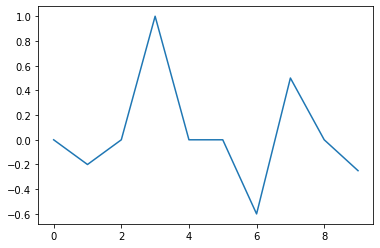

In [162]:

fig = plt.plot(polarity)
#plot sth
plt.savefig('polarity.png')

html = '<img src=\'polarity.png\'>'

with open('polarity.html','w') as f:
    f.write(html)
webbrowser.open('./polarity.html', new=2)

In [183]:
data = requests.get('http://localhost:8080/chat/0/sentiment').json()
data

{'mess-0': {'John Wick': 'Hey Mike, whats up??'},
 'mess-1': {'Mike Wazowski': 'Dude!!! 😀️ Did you watch the game last night?'},
 'mess-2': {'John Wick': 'No, had to work. How was it?'},
 'mess-3': {'Mike Wazowski': 'Awesome! Boyander scored 3 goals!'},
 'mess-4': {'John Wick': 'No way! 😮️'},
 'mess-5': {'Mike Wazowski': 'Way...'},
 'mess-6': {'John Wick': 'I bet people went crazy'},
 'mess-7': {'Mike Wazowski': 'For sure. We stayed at KuboLoco until 6AM.'},
 'mess-8': {'John Wick': 'Motherfucker! Hungover? 😵️'},
 'mess-9': {'Mike Wazowski': 'Dead, burried and still suffering! \U0001f92e️'},
 'sentiment': {'polarity': 0.045000000000000005,
  'subjectivity': 0.3422222222222222}}

In [177]:
for e in data:
    data[e]
    for el in data[e]:
        print(data[e][el])

Hey Mike, whats up??
Dude!!! 😀️ Did you watch the game last night?
No, had to work. How was it?
Awesome! Boyander scored 3 goals!
No way! 😮️
Way...
I bet people went crazy
For sure. We stayed at KuboLoco until 6AM.
Motherfucker! Hungover? 😵️
Dead, burried and still suffering! 🤮️
0.045000000000000005
0.3422222222222222
